## About

This page showcases the work of [Tuo Wang](https://tuowang.rbind.io/) that introduces packages to make [`ggplot2`](https://ggplot2.tidyverse.org/) plots more beautiful. You can find the original [R](https://www.r-graph-gallery.com/) code on Tuo's blog [here](https://tuowang.rbind.io/post/2021-03-25-ggplot2-extensions/). 

Thanks to him for accepting sharing his work here! Thanks also to [Tomás Capretto](https://tcapretto.netlify.app/) who translated this work from R to Python! 🙏🙏

## Load libraries

In addition, we import `load_penguins()` from the palmerpenguins library to have access to the popular palmerpenguins dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from palmerpenguins import load_penguins

## Load and prepare the data

The data we use today were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). This dataset was popularized by [Allison Horst](https://www.allisonhorst.com/) in her R package [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/) with the goal to offer an alternative to the iris dataset for data exploration and visualization.

In [2]:
penguins = load_penguins()
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


First of all, drop observations with missing values. ggradar allows us to make radar plot with ggplot2. We need to reorganize the data.

After group_by and summarise, we need to rescale the values to [0,1].

In [3]:
penguins = penguins.dropna()

In [4]:
def rescale(x):
    return (x - np.min(x)) / np.ptp(x)

In [5]:
penguins_radar = (
    penguins.groupby('species').agg(
        avg_bill_length = ("bill_length_mm", np.mean),
        avg_bill_depth = ("bill_depth_mm", np.mean),
        avg_flipper_length = ("flipper_length_mm", np.mean),
        avg_body_mass = ("body_mass_g", np.mean)
    )
    .apply(lambda x: rescale(x))
    .reset_index()
)

In [6]:
penguins_radar

,species,avg_bill_length,avg_bill_depth,avg_flipper_length,avg_body_mass
0,Adelie,0.000000,0.978584,0.000000,0.000000
1,Chinstrap,1.000000,1.000000,0.210846,0.019422
2,Gentoo,0.873549,0.000000,1.000000,1.000000


In [7]:
BG_WHITE = "#fbf9f4"
BLUE = "#2a475e"
GREY70 = "#b3b3b3"
GREY_LIGHT = "#f2efe8"
COLORS = ["#FF5A5F", "#FFB400", "#007A87"]

In [8]:
SPECIES = penguins_radar["species"].values.tolist()
VARIABLES = penguins_radar.columns.tolist()[1:]
VARIABLES_N = len(VARIABLES)
 
ANGLES = [n / float(VARIABLES_N) * 2 * np.pi for n in range(VARIABLES_N)]
ANGLES += ANGLES[:1]
    
X_VERTICAL_TICK_PADDING = 5
X_HORIZONTAL_TICK_PADDING = 50    


HANGLES = np.linspace(0, 2 * np.pi)
H0 = np.zeros(len(HANGLES))
H1 = np.ones(len(HANGLES)) * 0.5
H2 = np.ones(len(HANGLES))

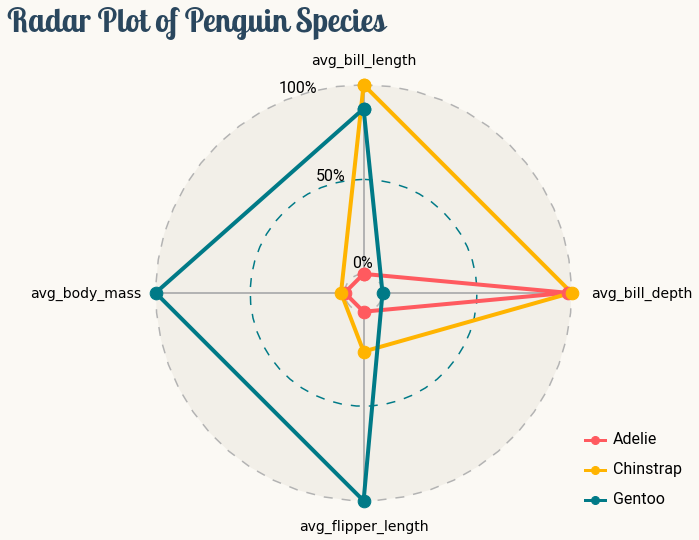

In [9]:
# Initialize layout ----------------------------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, polar=True)

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(ANGLES[:-1], VARIABLES);
 
ax.set_rlabel_position(0)
plt.yticks([])
plt.ylim(-0.1, 1.05)
plt.xticks(size=14)

ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

ax.plot(HANGLES, H0, ls=(0, (6, 6)), c=GREY70)
ax.plot(HANGLES, H1, ls=(0, (6, 6)), c=COLORS[2])
ax.plot(HANGLES, H2, ls=(0, (6, 6)), c=GREY70)
ax.fill(HANGLES, H2, GREY_LIGHT)

XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0::2]:
    tick.set_pad(X_VERTICAL_TICK_PADDING)
    
for tick in XTICKS[1::2]:
    tick.set_pad(X_HORIZONTAL_TICK_PADDING)

    
ax.plot([0, 0], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi, np.pi], [0, 1], lw=2, c=GREY70)
ax.plot([np.pi / 2, np.pi / 2], [0, 1], lw=2, c=GREY70)
ax.plot([-np.pi / 2, -np.pi / 2], [0, 1], lw=2, c=GREY70)

# Plot lines and dots --------------------------------------------
for idx, species in enumerate(SPECIES):
    values = penguins_radar.iloc[idx].drop("species").values.tolist()
    values += values[:1]
    ax.plot(ANGLES, values, c=COLORS[idx], linewidth=4, label=species)
    ax.scatter(ANGLES, values, s=160, c=COLORS[idx], zorder=10)

# Create and add legends -----------------------------------------
handles = [
    Line2D(
        [], [], 
        c=color, 
        lw=3, 
        marker="o", 
        markersize=8, 
        label=species
    )
    for species, color in zip(SPECIES, COLORS)
]

legend = plt.legend(
    handles=handles,
    loc=(1, 0),       # bottom-right
    labelspacing=1.5, # add space between labels
    frameon=False     # don't put a frame
)

# Iterate through text elements and species names
for text, species in zip(legend.get_texts(), SPECIES):
    text.set_text(species)       # Set species name
    text.set_fontname("Roboto")  # Change default font 
    text.set_fontsize(16)        # Change default font size

np.pi
# Add levels -----------------------------------------------------
PAD = 0.05
ax.text(-0.4, 0 + PAD, "0%", size=16, fontname="Roboto")
ax.text(-0.4, 0.5 + PAD, "50%", size=16, fontname="Roboto")
ax.text(-0.4, 1 + PAD, "100%", size=16, fontname="Roboto")
    
# Add title ------------------------------------------------------
plt.suptitle(
    "Radar Plot of Penguin Species",
    x = 0.1,
    y = 1,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
);